In [1]:
import numpy as np 
import pandas as pd
import requests
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv', 
                 delimiter=',', index_col='Date')
df.head()
df.shape


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


(3650, 1)

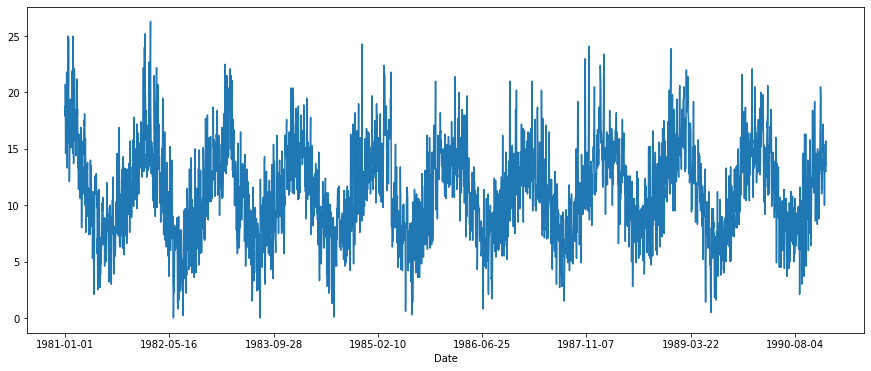

In [68]:
df['Temp'].plot(figsize=(15, 6));


In [80]:
alpha = 0.2
df['Temp_EWMA'] = df['Temp'].ewm(alpha=alpha, adjust=False).mean()


In [70]:
df.index.freq = 'MS'
ses = SimpleExpSmoothing(df['Temp'], initialization_method='legacy-heuristic')


In [71]:
res = ses.fit(smoothing_level=alpha, optimized=False)


In [75]:
df['SES'] = res.predict(start=df.index[0], end=df.index[-1]).reset_index()[0].values.tolist()


In [78]:
np.allclose(df['SES'], res.fittedvalues)

True

<AxesSubplot:xlabel='Date'>

,Temp,SES,Temp_EWMA
Date,,,
1981-01-01,20.7,20.7000,20.70000
1981-01-02,17.9,20.7000,20.14000
1981-01-03,18.8,20.1400,19.87200
1981-01-04,14.6,19.8720,18.81760
1981-01-05,15.8,18.8176,18.21408


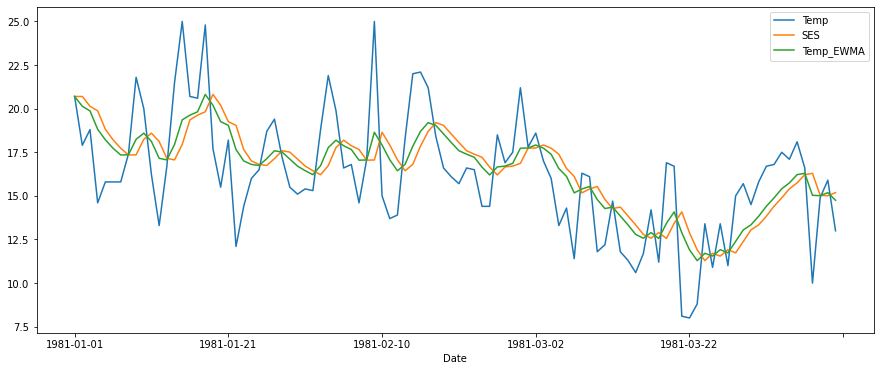

In [85]:
df.head(100).plot(figsize=(15, 6));
df.head(5)


In [86]:
N_test = 12
train = df.iloc[:-N_test, :]
test = df.iloc[-N_test:, :]


In [88]:
ses_train = SimpleExpSmoothing(
  train['Temp'], initialization_method='legacy-heuristic'  
)
res_train = ses_train.fit()


In [89]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]


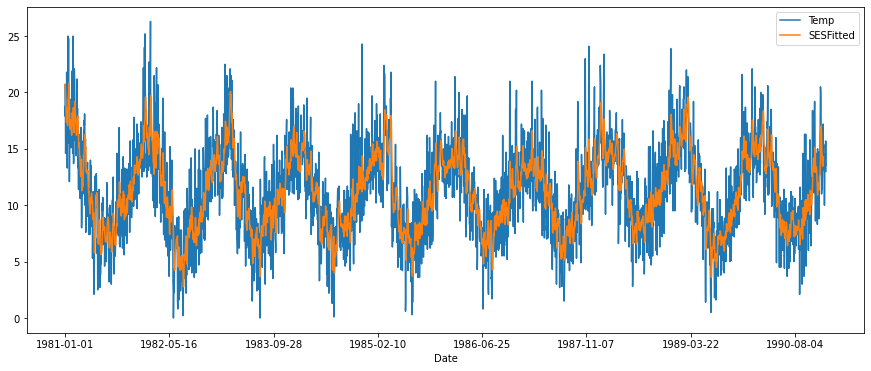

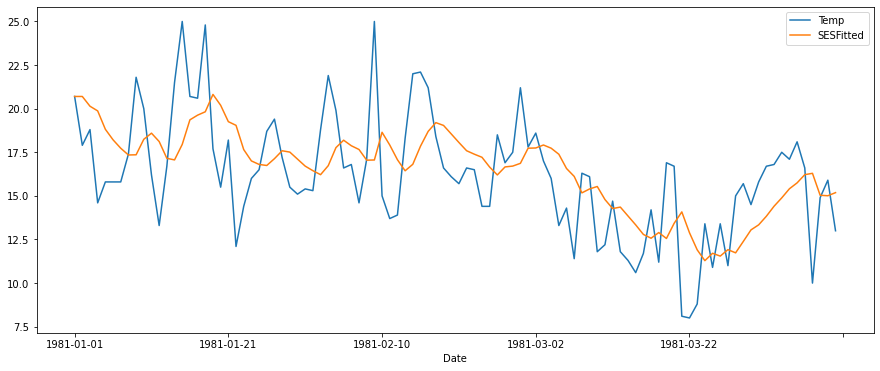

In [91]:
df.loc[train_idx, 'SESFitted'] = res.fittedvalues
df.loc[test_idx, 'SESFitted'] = res.forecast(N_test)
df[['Temp', 'SESFitted']].plot(figsize=(15, 6));
df[['Temp', 'SESFitted']].head(100).plot(figsize=(15, 6));



In [92]:
res.params

{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 20.7,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}